<a href="https://colab.research.google.com/github/filiperobotic/cursoDL/blob/master/codes/aula2/MLP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com Multilayer Perceptron

Olá! Nesse exercício você irá construir uma rede MLP com uma camada escondida. Neste exercício você irá aprender a :


*   Implementar um classificador binário MLP com uma camada escondida;
*   Usar função de ativação não-linear, tal como *tanh*;
*   Computar a função de perda de Cross-Entropy;
*   Implementar a propagação *forward* e *backward*.





## 1 - Pacotes ##

Pacotes necessários durante essa tarefa:
- [numpy](www.numpy.org) é um pacote científico fundamental para computação com Python.
- [sklearn](http://scikit-learn.org/stable/)  fornece ferramentas eficientes para mineração e análise de dados.
- [matplotlib](http://matplotlib.org) é uma biblioteca para plotar gráficos em python.
- *testCases* fornecem alguns exemplos de teste para assegurar a corretude das suas funções.
- *planar_utils* provê várias funções úteis usadas nessa tarefa.

In [1]:
!git clone https://github.com/filiperobotic/DL_Mestrado

Cloning into 'DL_Mestrado'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 171 (delta 25), reused 0 (delta 0), pack-reused 103
Receiving objects: 100% (171/171), 5.43 MiB | 14.34 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from DL_Mestrado.codes.aula3.testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from DL_Mestrado.codes.aula3.planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

Primeiro, vamos carregar o dataset que iremos trabalhar. O código seguinte irá carregar o dataset "flower" (de duas classes) em duas variáveis `X` e `Y`.

In [3]:
X, Y = load_planar_dataset()

Visualize o dataset usando o matplotlib. A base irá se parecer com uma flor com pontos em rótulos vermelhos (y=0) e rótulos azuis (y=1). Seu objetivo é construir um modelo para se ajustar a essa base. Em outras palavras, queremos que o classificador define regiões de fronteira para os rótulos vermelho e azul.

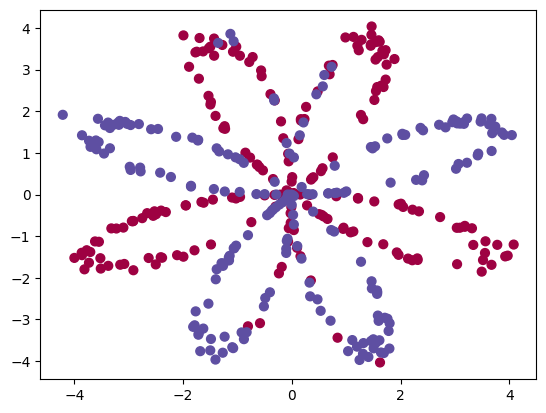

In [4]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Você tem:


*   um array-numpy (matriz) X que contêm as caraterísticas  (x1, x2)
*   um array-numpy (vetor) Y que contêm os rótulos  (vermelho:0, azul:1).


Vamos primeiro analisar como é o nosso dado.

**Exercício**: Quantos exemplos de treinamento nós temos? Qual é o tamanho das variáveis X e Y?

**Dica**: Use a função shape para pegar o tamanho de um array numpy.[(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [5]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]   # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**Saída Esperada**:
        
<table style="width:20%">
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td>
  </tr>
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td>
  </tr>
    <tr>
    <td>**m**</td>
    <td> 400 </td>
  </tr>
</table>

## 3 - Rede Neural

Você irá treinar uma rede neural com uma única camada escondida.

**Aqui está o seu modelo**:
<img src="https://github.com/Kulbear/deep-learning-coursera/blob/master/Neural%20Networks%20and%20Deep%20Learning/images/classification_kiank.png?raw=1" style="width:600px;height:300px;">

**Matematicamente**:

Para cada exemplo $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Dado as predições de todos os exemplos, você também pode computar o custo  $J$, como mostrado a seguir:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$



**Lembrete**: A metodologia geral para construir uma Rede Neurais é:


1.   Definir a arquitetura da rede neural (número de entradas, número de neurônios na camada escondida, etc);
2.   Inicializar os parâmetros do modelo;
3.   Loop - Implementar propagação *feedforward* - Computar a Função de Perda - Implementar o *backpropagation* para pegar os gradientes - Atualizar os parâmetros (gradiente descendente).

### 4.1 - Definindo a estrutura da rede neural ####



**Exercício**: Defina três variáveis:


*   n_x: tamanho da camada de entrada
*   n_h: o tamanho da camada escondida (definir com 4)
*  n_y: o tamanho da camda de saída


**Dica**: Use os tamanhos de X e Y para encontrar n_x e n_y. Use a função 'shape'. Para o tamanho da camada escondida defina o tamanho 4.

In [6]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x =  X.shape[0]  # size of input layer
    n_h = 4
    n_y = Y.shape[0]  # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [7]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**Saída Esperada** (esses não são os tamanhos que você irá usar para a sua rede. Eles são usados apenas para testar a função que você implementou.).

<table style="width:20%">
   <tr>
     <td>**n_x**</td>
     <td> 5 </td>
   </tr>
     <tr>
     <td>**n_h**</td>
     <td> 4 </td>
   </tr>
     <tr>
     <td>**n_y**</td>
     <td> 2 </td>
   </tr>
 </table>

### 4.2 - Inicialize os parâmetros do modelo  ####

**Exercício**: Implemente a função `initialize_parameters()`.

**Instruções**:
- Esteja certo que os tamanhos dos parâmetros estão corretos. Olhe a rede neural da figura acima caso necessário.
- Você irá inicializar os pesos das matrizes com valores aleatórios.
    - Use: `np.random.randn(a,b) * 0.01` para inicializar randomicamente uma matriz de tamanho  (a,b).
- Você irá inicializar o vetor bias com zeros.
    - Use: `np.zeros((a,b))` para inicializar uma matriz de tamanho (a,b) com zeros.

In [8]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [9]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-1.05795222 -0.90900761  0.55145404  2.29220801]]
b2 = [[0.]]


**Expected Output**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td>
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td>
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td>
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.]] </td>
  </tr>
  
</table>



### 4.3 - Loop ####

**Exercício**: Implemente `forward_propagation()`.

**Instruções**:
$ $
- Olhe acima a representação matemática do seu classificador.
- Você pode usar a função `sigmoid()`. Ela é uma função importada da biblioteca.
- Você também pode usar a função `np.tanh()` no lugar da sigmoide, se quiser.
- O passo que você deve implementar é:
    1. Obtenha cada parâmetro do dicionário "parameters" (que é a saída de `initialize_parameters()`) usando `parameteres[".."]`.
    2. Implemente a propagação *Forward*. Compute $Z^{[1]}$, $A^{[1]}, Z^{[2]}$ e $A^{[2]}$ (vetor de todas as predições de todos os exemplos do conjunto de treinamento).
- Valores necessários no *backpropagation* são guardados em "`cache`", que será usado como entrada para a função de *backpropagation*.



In [10]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']


    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    ### END CODE HERE ###

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [11]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 -0.8636835876611545


**Saída Esperada**:
<table style="width:50%">
   <tr>
     <td> 0.262818640198 0.091999045227 -1.30766601287 0.212877681719 </td>
   </tr>
 </table>

Agora que você computou $A^{[2]}$ (na variável "A2"), que contém $a^{[2](i)}$ para cada exemplo $i$, você pode calcular a função de custo conforme a equação a seguir:


$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{7}$$

**Exercício**: Implemente `compute_cost()` para computar o valor da função de perda  $J$.

**Instruções**:
- Existem várias formas de calcular a função de perda de *cross-entropia*. Para ajudá-lo, mostramos como você poderia implementar o somatório $- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:

```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(você pode usar `np.multiply()` e depois `np.sum()` ou diretamente `np.dot()`.
Observe que se você usar `np.multiply` seguido de `np.sum`, o resultado final será do tipo `float`, enquanto que se você usar `np.dot`, o resultado será um array numpy 2D. Você pode usar `np.squeeze()` para remover dimensões redundantes (em caso de um único `float`, ele irá ser reduzido para um array de dimensão zero). Você pode usar um cast no array para ser do tipo `float` usando `float()`.


In [12]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (7)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2

    Returns:
    cost -- cross-entropy cost given equation (7)
    """

    m = Y.shape[1] # number of example

    # Retrieve W1 and W2 from parameters

    W1 = parameters['W1']
    W2 = parameters['W2']


    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)

    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log((1 - A2)), (1 - Y))
    cost = - np.sum(logprobs) / m
    ### END CODE HERE ###

    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect.
                                # E.g., turns [[17]] into 17
    assert(isinstance(cost, float))

    return cost

In [13]:
A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


**Saída Esperada**:
 <table style="width:20%">
   <tr>
     <td>**cost**</td>
     <td> 0.693058761... </td>
   </tr>
   
 </table>

Usando o `cache` computado durante a fase de propagação *forward*, você pode implementar a propagação *backward*.

 **Tarefa**: Implementar a função `backward_propagation()`.

 **Instruções**:
 O *backpropagation* normalmente é a parte mais trabalhosa (mais matemática) do processamento de uma rede neural. Abaixo estão um resumo das equações vistas em sala. Você irá querer usar as seis equações à direita, uma vez que estamos construindo a implementação vetorizada.

 <img src="https://github.com/filiperobotic/DL_Mestrado/blob/master/imagens/grad_summary.png?raw=1" style="width:600px;height:300px;">


 <!--
 $\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

 $\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

 $\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

 $\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

 $\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

 $\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

 - Note that $*$ denotes elementwise multiplication.
 - The notation you will use is common in deep learning coding:
     - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
     - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
     - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
     - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
     
 !-->

 - Dicas:
     - Para computar dZ1, você irá precisar computar $g^{[1]'}(Z^{[1]})$. Uma vez que $g^{[1]}(.)$ é a função de ativação *tanh*, se $a = g^{[1]}(z)$, então $g^{[1]'}(z) = 1-a^2$. Então, você pode computar $g^{[1]'}(Z^{[1]})$ usando `(1 - np.power(A1, 2))`


In [14]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###

    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###

    # Backward propagation: calculate dW1, db1, dW2, db2.
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [15]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


<table style="width:80%">
   <tr>
     <td>**dW1**</td>
     <td> [[ 0.00301023 -0.00747267]
  [ 0.00257968 -0.00641288]
  [-0.00156892  0.003893  ]
  [-0.00652037  0.01618243]] </td>
   </tr>
   
   <tr>
     <td>**db1**</td>
     <td>  [[ 0.00176201]
  [ 0.00150995]
  [-0.00091736]
  [-0.00381422]] </td>
   </tr>
   
   <tr>
     <td>**dW2**</td>
     <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td>
   </tr>
   

   <tr>
     <td>**db2**</td>
     <td> [[-0.16655712]] </td>
   </tr>
   
 </table>  

**Exercício**: Implemente a regra de atualização, usando o gradiente descendente. Você deve usar (dW1, db1, dW2, db2) para poder atualizar (W1, b1, W2, b2).


 **Regra Geral do Gradiente Descendente**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ onde $\alpha$ é a taxa de aprendizado e  $\theta$ representa o parâmetro.

 **Ilustração**: O algoritmo de gradiente descendente com uma boa taxa de aprendizado (convergindo) e com taxa de aprendizado ruim (divergindo). Crédito da imagem: Adam Harley.

 <img src="https://github.com/filiperobotic/DL_Mestrado/blob/master/imagens/sgd.gif?raw=1" style="width:400;height:400;"> <img src="https://github.com/filiperobotic/DL_Mestrado/blob/master/imagens/sgd_bad.gif?raw=1" style="width:400;height:400;">



In [16]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###

    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [17]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


 **Saída Esperada**:


 <table style="width:80%">
   <tr>
     <td>**W1**</td>
     <td> [[-0.00643025  0.01936718]
  [-0.02410458  0.03978052]
  [-0.01653973 -0.02096177]
  [ 0.01046864 -0.05990141]]</td>
   </tr>
   
   <tr>
     <td>**b1**</td>
     <td> [[ -1.02420756e-06]
  [  1.27373948e-05]
  [  8.32996807e-07]
  [ -3.20136836e-06]]</td>
   </tr>
   
   <tr>
     <td>**W2**</td>
     <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td>
   </tr>
   

   <tr>
     <td>**b2**</td>
     <td> [[ 0.00010457]] </td>
   </tr>
   
 </table>  

### 4.4 - Integrando partes 4.1, 4.2 e 4.3 no nn_model() ####


**Exercício**: Construa seu modelo de rede neural em  `nn_model()`.

**Instruções**: O modelo de rede neural deve usar as funções anteriores na ordem correta.

In [18]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, learning_rate,  num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']


    # Loop (gradient descent)

    for i in range(0, num_iterations):

        ### START CODE HERE ###
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###



        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [19]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, 1.02,num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: nan
Cost after iteration 1000: 0.000072


<ipython-input-12-2ebf0b65b9b7>:27: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log((1 - A2)), (1 - Y))


Cost after iteration 2000: 0.000044
Cost after iteration 3000: 0.000037
Cost after iteration 4000: 0.000033
Cost after iteration 5000: 0.026192
Cost after iteration 6000: 0.000026
Cost after iteration 7000: 0.000022
Cost after iteration 8000: 0.000023
Cost after iteration 9000: 0.000373
W1 = [[-0.13374669  0.76965902]
 [-0.13930419  0.68747514]
 [ 0.09102822 -0.47259777]
 [ 0.83509151 -2.46778318]]
b1 = [[-1.06059118]
 [-0.91723243]
 [ 0.58242882]
 [ 1.32489915]]
W2 = [[-0.91406849 -0.82452467  0.57304827  2.15793875]]
b2 = [[1.35401315]]


### 4.5 Predicões



<!-- **Lembrete**: Predições = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$   -->

**Exercício**: Use seu modelo para predição implementando a função `predict()`.Use a propagação *forward* para inferir os resultados.

 **Lembrete**: predição = $y_{prediction} = \mathbb 1 \text{{ativação > 0.5}} =
\begin{cases}
     1 &  \text{if}\ \text{ativação > 0.5} \\
     0 & \text{otherwise}
\end{cases}$

Como exemplo, se você quiser ajustar as entradas da matriz X para 0 e 1 baseado em um limiar, você deve fazer ```X_new = (X > threshold)```
     

    


In [20]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    predictions, cache = forward_propagation(X, parameters)
    print(predictions)
    predictions = (predictions > 0.5)
    print(predictions)
    ### END CODE HERE ###

    return predictions

In [21]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))


[[ 0.00616259 -0.00401733  0.00855115]]
[[False False False]]
predictions mean = 0.0


**Saída Esperada**:


 <table style="width:40%">
   <tr>
     <td>**predictions mean**</td>
     <td> 0.666666666667 </td>
   </tr>
   
 </table>


É hora de rodar o modelo e ver o desempenho dele na base *planar*. Rode o códio abaixo e teste seu modelo com uma única camada escondida de $n_h$ unidades escondidas.


Cost after iteration 0: nan


<ipython-input-12-2ebf0b65b9b7>:27: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log((1 - A2)), (1 - Y))


Cost after iteration 1000: nan
Cost after iteration 2000: nan
Cost after iteration 3000: nan
Cost after iteration 4000: nan
Cost after iteration 5000: nan
Cost after iteration 6000: nan
Cost after iteration 7000: nan
Cost after iteration 8000: nan
Cost after iteration 9000: nan
[[ 0.93902539  0.93954744  0.94000824 ... -0.09403551 -0.093559
  -0.09302117]]
[[ True  True  True ... False False False]]


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

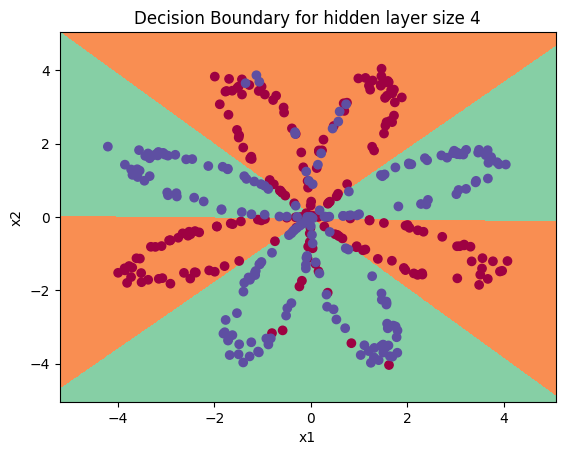

In [22]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, 1.2 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [23]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

[[-0.00845777  0.87265198  0.87276298  0.87261851  0.26646779  0.87261803
  -0.096964    0.87389562  0.29590774  0.30876944 -0.09733133  0.87261803
   0.30871413  0.30115847 -0.09713302  0.18818044  0.29462632  0.29156208
   0.14082875 -0.0961851   0.30772562 -0.09771491 -0.09771549 -0.09751285
  -0.09768629  0.26448087 -0.09026441  0.27448376 -0.0908497  -0.09770692
  -0.0309967  -0.09555813 -0.0824894  -0.06820813 -0.09438397 -0.09768272
  -0.04771833 -0.09732324 -0.07602527  0.38390513 -0.0976942  -0.09751406
  -0.09768159 -0.09680429 -0.01454604 -0.09771712  0.39761511 -0.09682717
   0.46210232  0.08021129  0.55957672  0.15613114 -0.09755382  0.3025611
   0.56699033 -0.09630349 -0.09681364 -0.09682696 -0.09371477 -0.09682716
   0.36664098 -0.09682717 -0.09682677 -0.06543659 -0.09682715 -0.09657793
  -0.09682717 -0.09682003  0.23174729  0.63984999  0.54604042 -0.09667077
  -0.09682717 -0.09682674 -0.09682717  0.36361774 -0.09682717 -0.09674172
  -0.09682717 -0.0963597  -0.09682717 -

A Acurácia é alta comparado com o modelo de Regressão logística. Vamos tentar com mais neurônios na camada escondida.

### 4.6 - Ajustando o tamanho da camada escondida ###

Rode o código a seguir. Ele deve demorar 1-2 minutos. Você irá observar diferentes comportamentos do modelo usando diferentes tamanhos de camada escondida.

<ipython-input-12-2ebf0b65b9b7>:27: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log((1 - A2)), (1 - Y))


[[0.56487826 0.56487826 0.56487826 ... 0.09181365 0.09181365 0.09181366]]
[[ True  True  True ... False False False]]
[[0.09400668 0.56487826 0.56487825 0.56487826 0.14009804 0.56487826
  0.10214345 0.56487816 0.30070989 0.54057486 0.09575643 0.56487826
  0.48087297 0.54033706 0.09966761 0.56483946 0.11132789 0.56217133
  0.09263281 0.09324153 0.54409246 0.17524316 0.10165728 0.09548353
  0.2999818  0.0926813  0.09373626 0.10999844 0.09403307 0.23294341
  0.09295708 0.09303191 0.09246945 0.09206958 0.09329481 0.24882328
  0.09546385 0.54150472 0.56487826 0.56484044 0.41636893 0.09760747
  0.10985875 0.56487826 0.56453195 0.24916298 0.56484445 0.56487826
  0.56484915 0.56487824 0.56487801 0.5647754  0.52832087 0.56480371
  0.56487568 0.56487826 0.56487826 0.56487826 0.56487826 0.56487826
  0.56487356 0.56487826 0.56487826 0.56487825 0.56487826 0.56487826
  0.56487823 0.56487796 0.56487411 0.56487683 0.56487539 0.56487826
  0.56487826 0.56487811 0.56487826 0.56487174 0.56487826 0.5648777

<ipython-input-12-2ebf0b65b9b7>:27: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log((1 - A2)), (1 - Y))
<ipython-input-12-2ebf0b65b9b7>:27: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log((1 - A2)), (1 - Y))


[[ 0.99953857  0.99953922  0.99953982 ... -0.06234543 -0.06199336
  -0.06162389]]
[[ True  True  True ... False False False]]
[[-0.35649106  0.57928766  0.56787008  0.62997108  0.2341083   0.96208311
  -0.20993077  0.5916746   0.36585035  0.36755404 -0.17126704  0.79149442
   0.37869063  0.35284775 -0.19505113 -0.19090348  0.41534708  0.31999971
  -0.2002282  -0.2062318   0.36571272 -0.08989275 -0.08420888 -0.15105662
  -0.1438183   0.26486458 -0.27430846  0.2944428  -0.27411347 -0.10944217
  -0.33723422 -0.21624713 -0.27865758 -0.28033321 -0.23583296 -0.14036242
  -0.36746623 -0.23561187  0.17578215  0.24191857 -0.14079477 -0.15455737
  -0.11589192  0.18755118 -0.4529501  -0.08849612  0.26447601  0.18453446
   0.39294876  0.39139435  0.57365248 -0.21032214 -0.27433241  0.1025545
   0.54877348  0.15091631  0.14994535  0.18753377  0.03736287  0.19250109
   0.4826482   0.17578233  0.18532438  0.04476431  0.19008811  0.10749034
   0.16143986  0.12779819  0.27638093  0.57112571  0.55270073

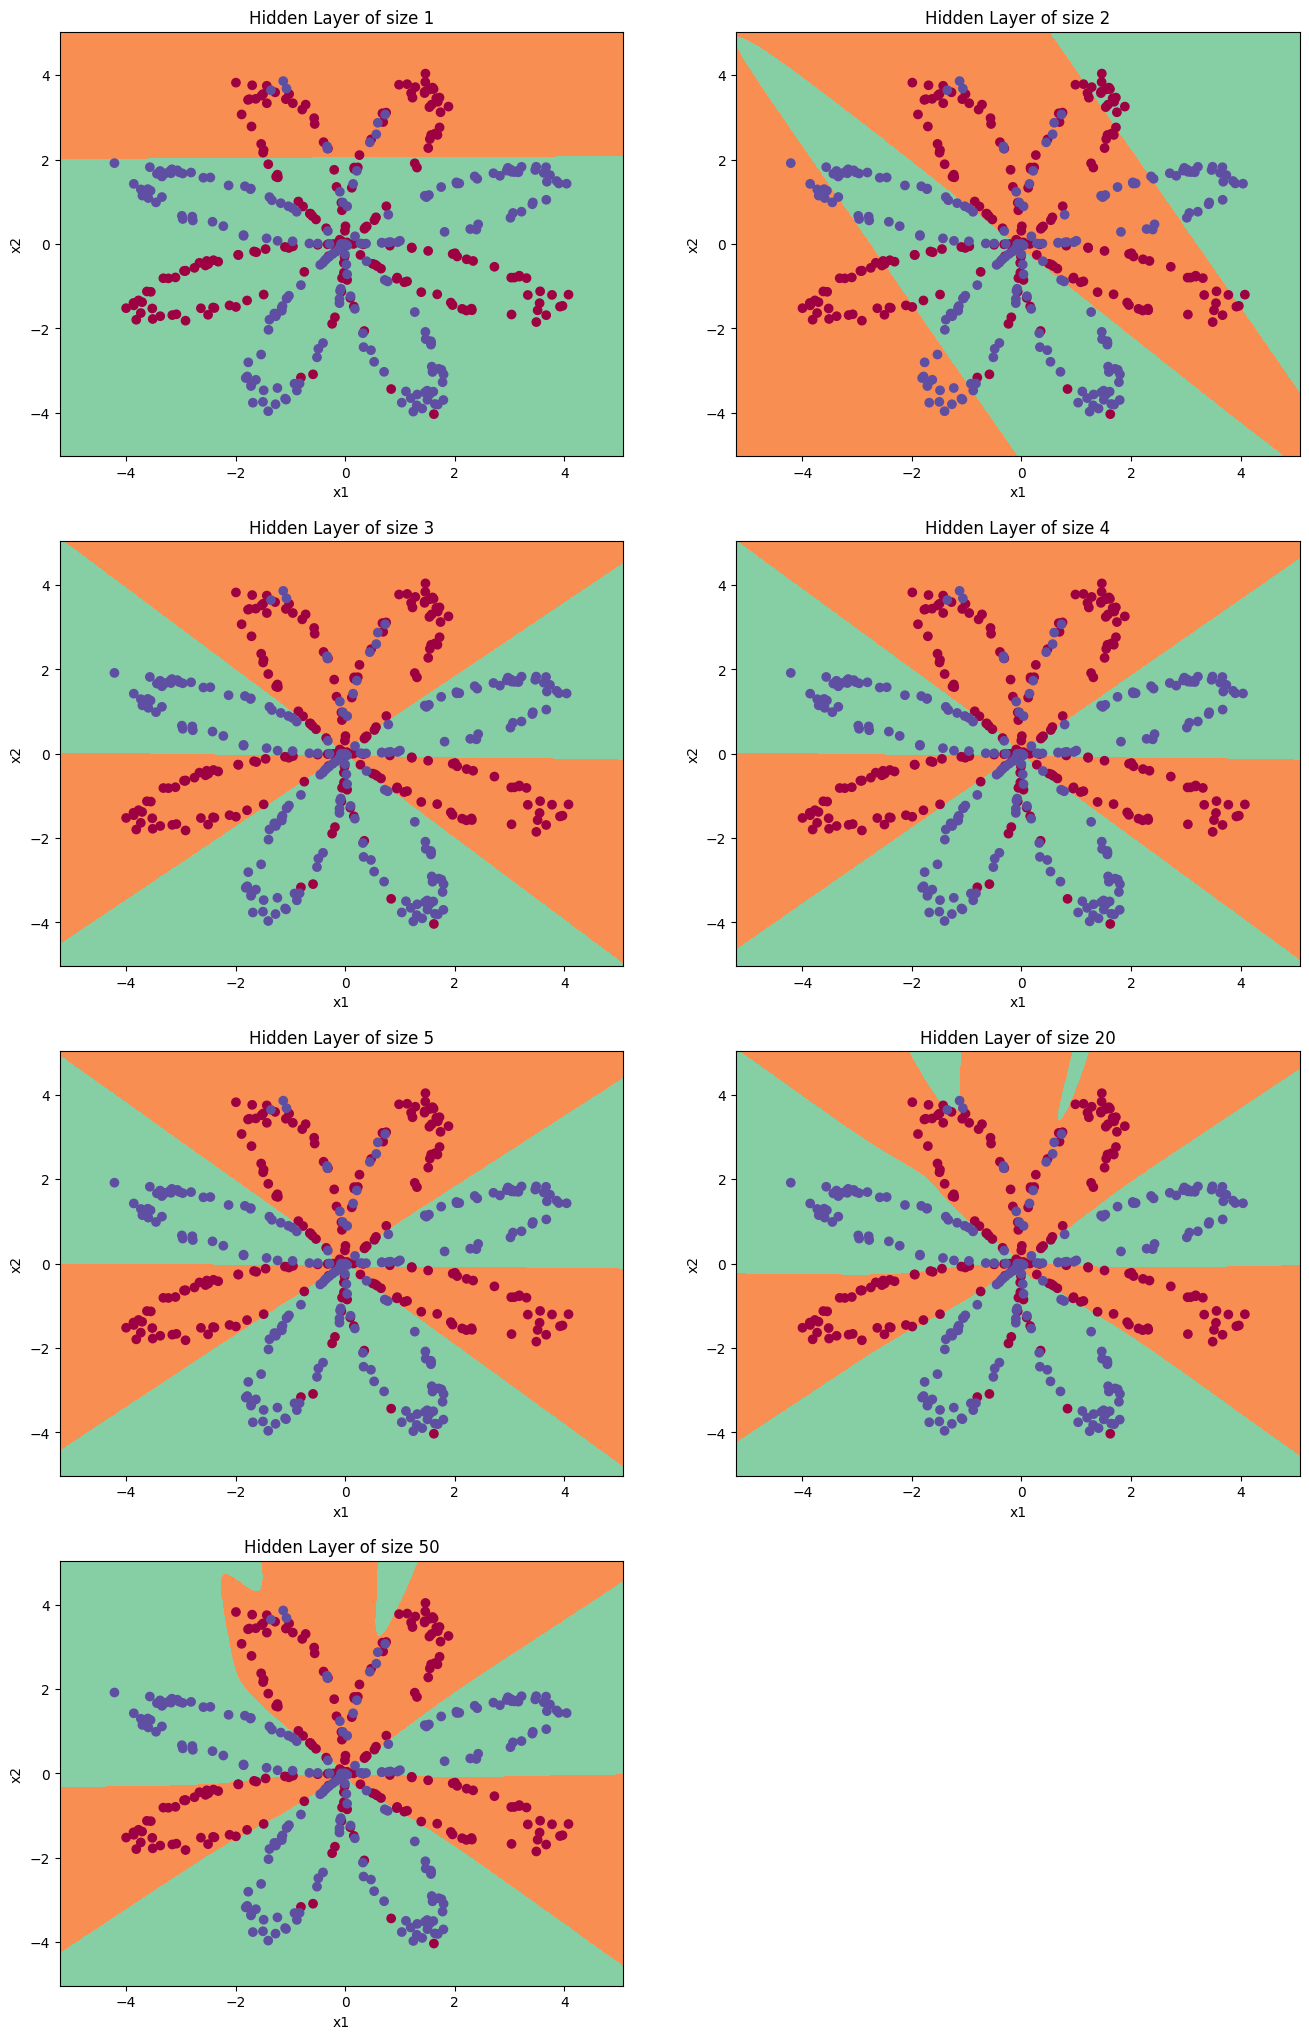

In [24]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,1.2, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))